In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform) # Download dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Load the data

In [2]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim = 1)
)

criterion = nn.NLLLoss() # Loss function used
optimizer = optim.SGD(model.parameters(), lr=0.003) # Stochastic-Gradient Descent optimizer with lr 0.003

In [3]:
epochs = 7 # Number of Iterations over the training data

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1) # Reshape images
        
        # Forward pass
        optimizer.zero_grad() # Initilize gradients to zeroes for each iteration
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9386312587937313
Training loss: 0.8844716535257632
Training loss: 0.525951398619965
Training loss: 0.4298087422019129
Training loss: 0.3871594771647504
Training loss: 0.3614222052604405
Training loss: 0.34301930279937637


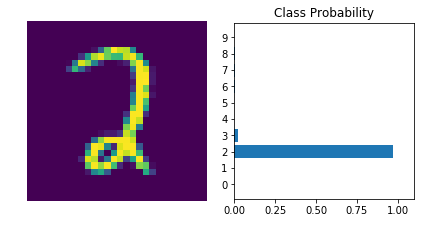

In [4]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)